<a href="https://colab.research.google.com/github/chdraw/data-analysis/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/train.csv')
data

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
147,148,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
148,149,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,150,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [ ]:
data = data.drop('id', axis=1)
#pd.set_option('display.max_columns', None) # 컬럼이 요약되지 않도록 설정합니다.
data # 데이터를 확인합니다.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
147,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
148,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [ ]:
def check_missing_col(dataframe):
  missing_col=[]
  for col in dataframe.columns:
    missing_values = sum(dataframe[col].isna())
    is_missing = True if missing_values >= 1 else False
    if is_missing:
        print(f'결측치가 있는 컬럼은: {col}입니다')
        print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
        missing_col.append([col, dataframe[col].dtype])
  if missing_col == []:
      print('결측치가 존재하지 않습니다')
  return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
numeric_feature = data.columns[(data.dtypes==int)|(data.dtypes==float)]
categorical_feature = data.columns[data.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
카테고리형 데이터는 다음과 같습니다. 
 []


ValueError: ignored

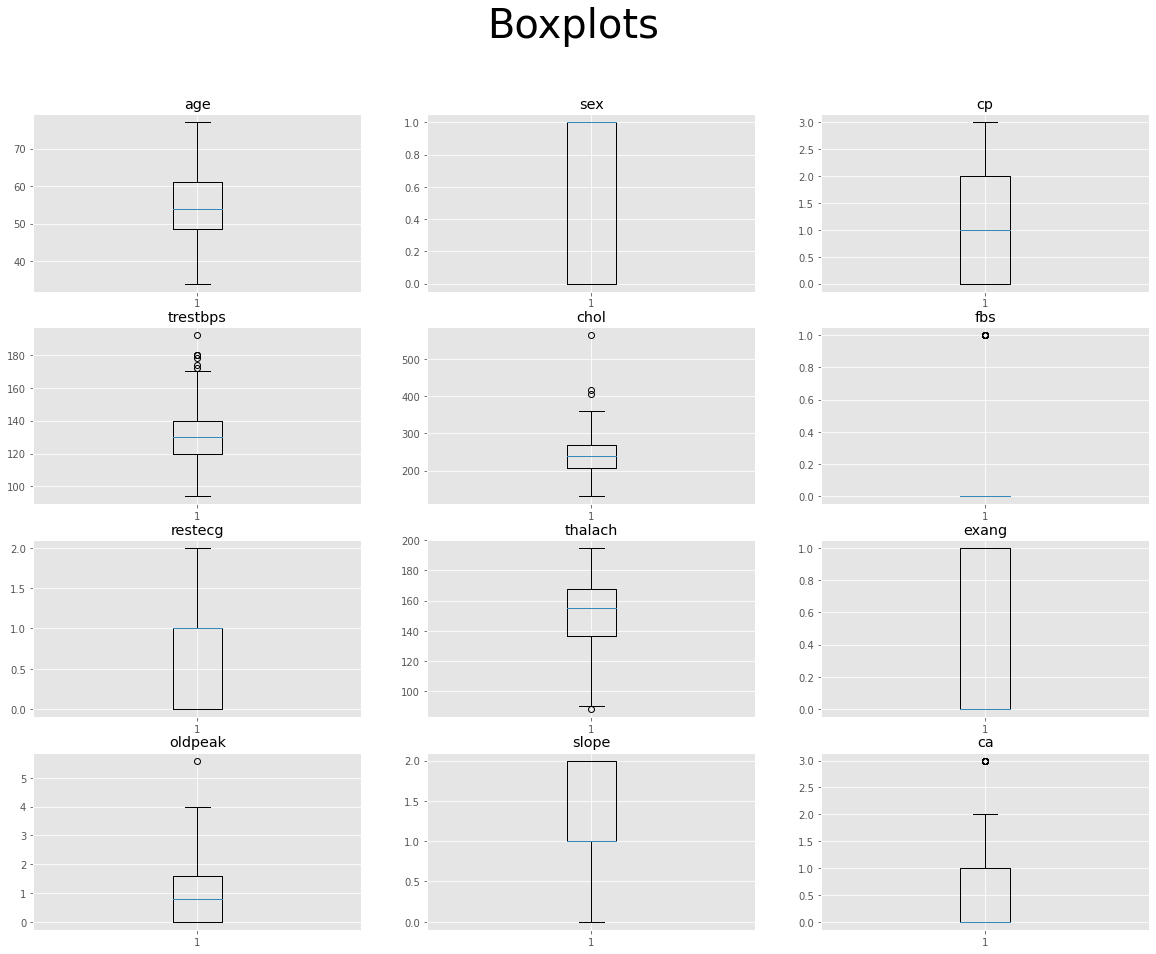

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(4,3,i+1) # 수치형 데이터가 11개이므로 4*3=12개 자리가 필요합니다.
    plt.title(feature[i])
    plt.boxplot(data[feature[i]])
plt.show()

In [ ]:
feature=categorical_feature

plt.figure(figsize=(20,10)) # 전체 figure의 x축길이, y축길이 (inch)
plt.suptitle("Bar Plot", fontsize=40) # 전체 figure의 제목 옵션 설정

for i in range(len(feature)): 
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp=data[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

<Figure size 1440x720 with 0 Axes>

In [ ]:
from sklearn.preprocessing import LabelEncoder

corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

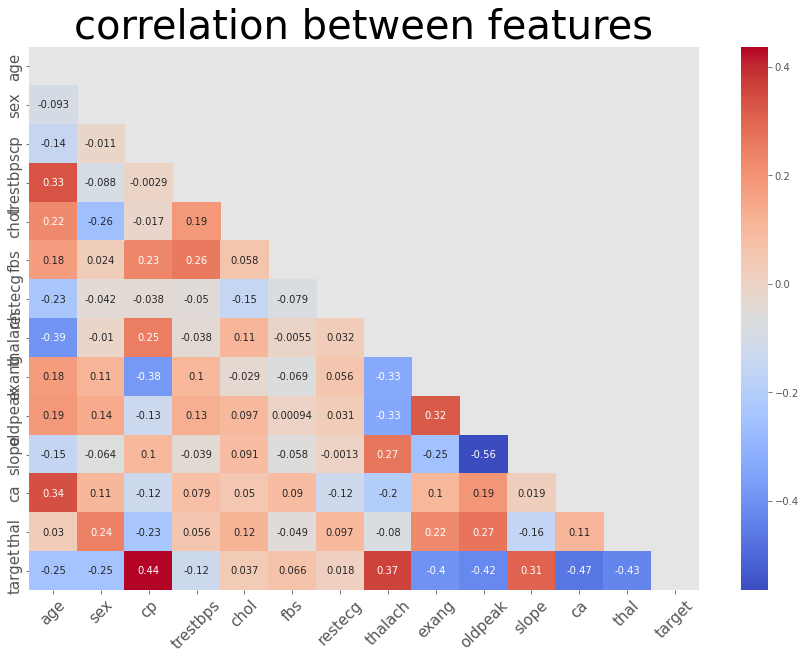

In [ ]:
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()